In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv("final_Marital_Status_and_Religion_cleaned.csv")

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 7581 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       7581 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [6]:
census_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
House Number,7581.0,26.807413,25.258199,1.0,8.0,20.0,37.0,150.0
Age,7581.0,37.210790,22.035577,0.0,19.0,36.0,53.0,119.0
Retired,7581.0,0.101306,0.301753,0.0,0.0,0.0,0.0,1.0
Employed,7581.0,0.628545,0.483226,0.0,0.0,1.0,1.0,1.0
Is Student,7581.0,0.248912,0.432411,0.0,0.0,0.0,0.0,1.0


In [7]:
census_df.select_dtypes(include='object').describe(include='all').transpose()

,count,unique,top,freq
Street,7581,105,Wharf Wells,314
First Name,7581,369,James,36
Surname,7581,623,Smith,204
Relationship to Head of House,7581,20,Head,2879
Marital Status,7581,5,Single,2596
Gender,7581,2,F,3946
Occupation,7581,1099,Student,1382
Infirmity,7581,6,None,7540
Religion,7581,8,Christian,3015
Address,7581,2878,"27, Brightwater Drive",22


In [8]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,Unknown,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,Unknown,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Ineligible,F,Student,None,Ineligible,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,Ineligible,M,Student,None,Ineligible,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,Unknown,"1, Simmons Meadow",0,1,0


___

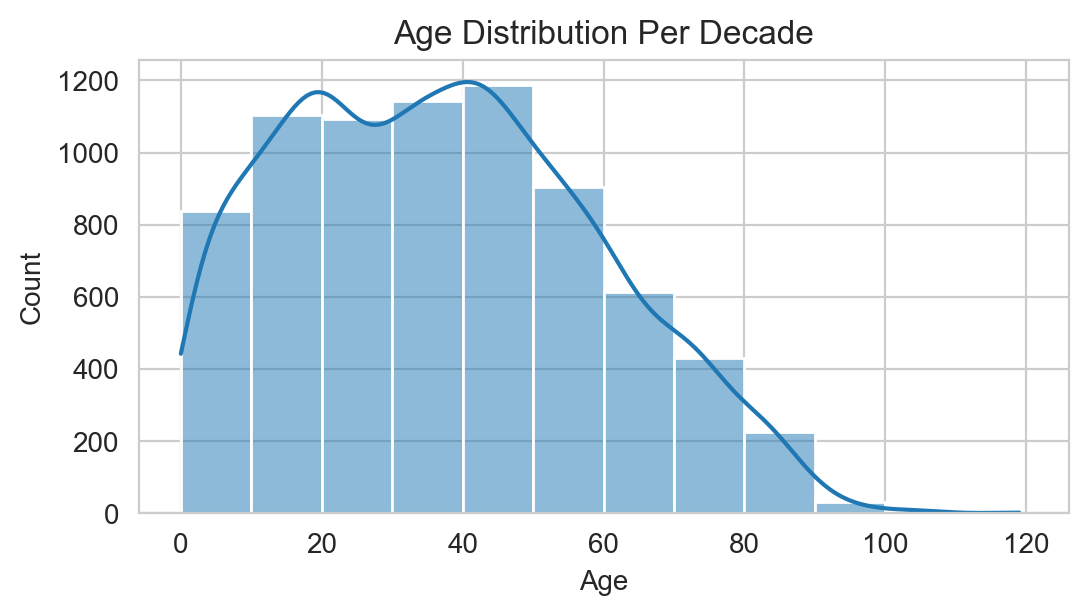

In [9]:
# Age distribution
sns.set_style(style='whitegrid')
age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)

pal = sns.dark_palette('brown', 2)

age_distr = sns.histplot(data=census_df, x='Age', binwidth=10, kde=True, palette=pal)
age_distr.set_title("Age Distribution Per Decade")

pal = sns.dark_palette('brown', 2)
sns.categorical.plt.show()

In [10]:
fname = "Age_distribution.png"
cd.fig_writer(fname, age_distr_fig)

'Age_distribution.png'

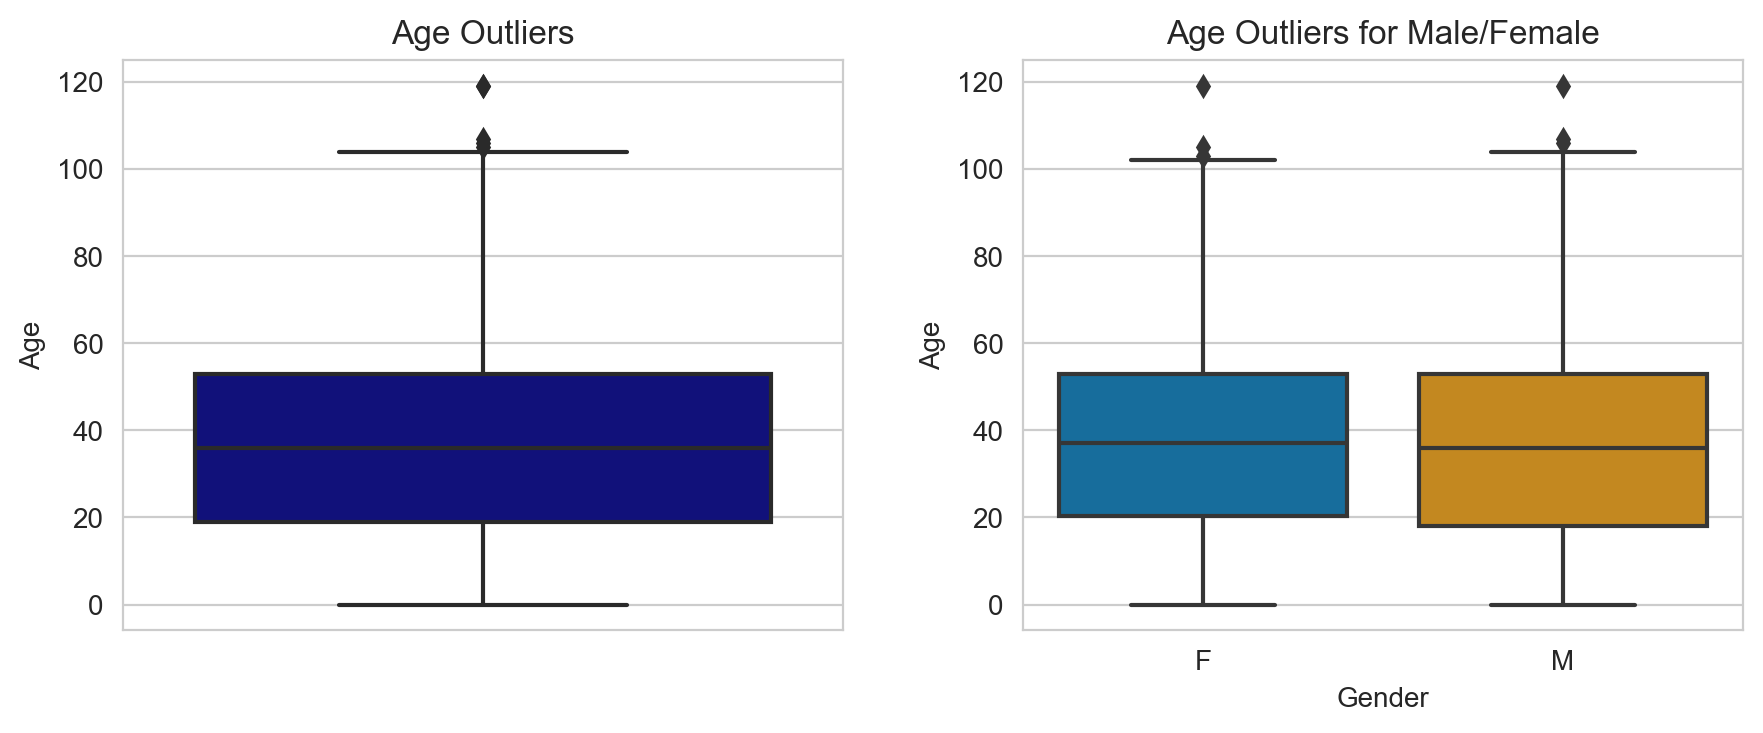

In [11]:
# Age distribution
sns.set_style(style='whitegrid')
age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = age_distr_fig.add_axes([0, 0, .6, .95]), age_distr_fig.add_axes([0.75, 0, .6, .95])

age_distr = sns.boxplot(data=census_df, y='Age', color='darkblue', ax=l)
hued_age_distr = sns.boxplot(data=census_df, y='Age', x='Gender', 
                             palette='colorblind', ax=r)

age_distr.set_title("Age Outliers"), hued_age_distr.set_title("Age Outliers for Male/Female")

sns.categorical.plt.show()

In [12]:
fname = "Hued_age_distribution.png"
cd.fig_writer(fname, age_distr_fig)

'Hued_age_distribution.png'

#### Average Age per Household

In [13]:
marital_average_age = census_df[['Marital Status', 'Age']].groupby(by=['Marital Status']).mean().astype(sns.relational.np.int64)
marital_average_age

,Age
Marital Status,
Divorced,42
Ineligible,9
Married,51
Single,37
Widowed,65


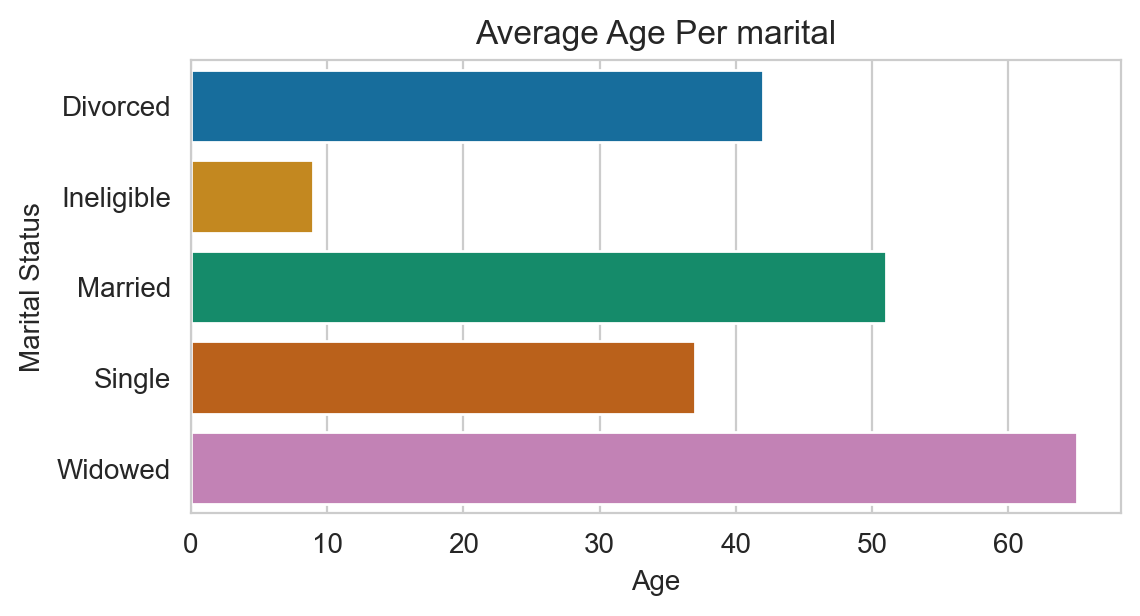

In [14]:
# distribution of age per marital
sns.set_style(style='whitegrid')

avg_marital_age_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
# l, r = avg_marital_age_fig.add_axes([0, 0, .6, .95]), avg_marital_age_fig.add_axes([0.75, 0, .6, .95])
pal = sns.dark_palette('brown', 2)

avg_marital_age = sns.barplot(y=marital_average_age.index, x=marital_average_age['Age'], palette='colorblind')
# avg_marital_age.set_ylabel('Population')

avg_marital_age.set_title("Average Age Per marital")

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [15]:
fname = "avg_age_per_marital.png"
cd.fig_writer(fname, avg_marital_age_fig)

'avg_age_per_marital.png'

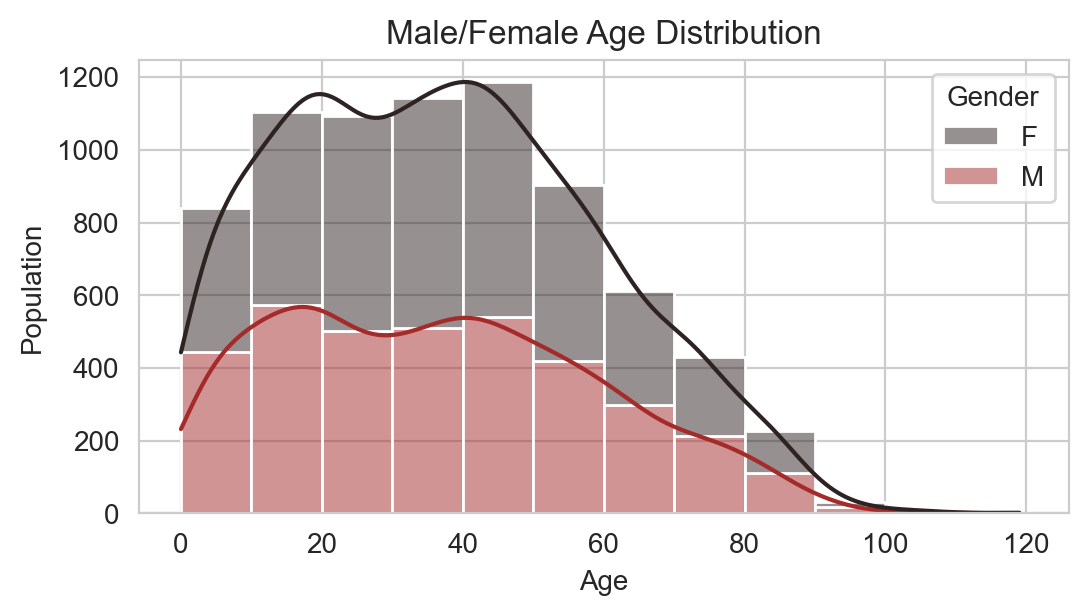

In [16]:
sns.set_style(style='whitegrid')

age_per_gender_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
# l, r = age_per_gender_fig.add_axes([0, 0, .6, .95]), age_per_gender_fig.add_axes([0.75, 0, .6, .95])
pal = sns.dark_palette('brown', 2)

age_per_gender = sns.histplot(data=census_df, x='Age', hue='Gender', binwidth=10,
                              kde=True, multiple='stack', palette=pal)
age_per_gender.set_ylabel('Population')

age_per_gender.set_title("Male/Female Age Distribution")

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [17]:
fname = "Age_per_gender.png"
cd.fig_writer(fname, age_per_gender_fig)

'Age_per_gender.png'

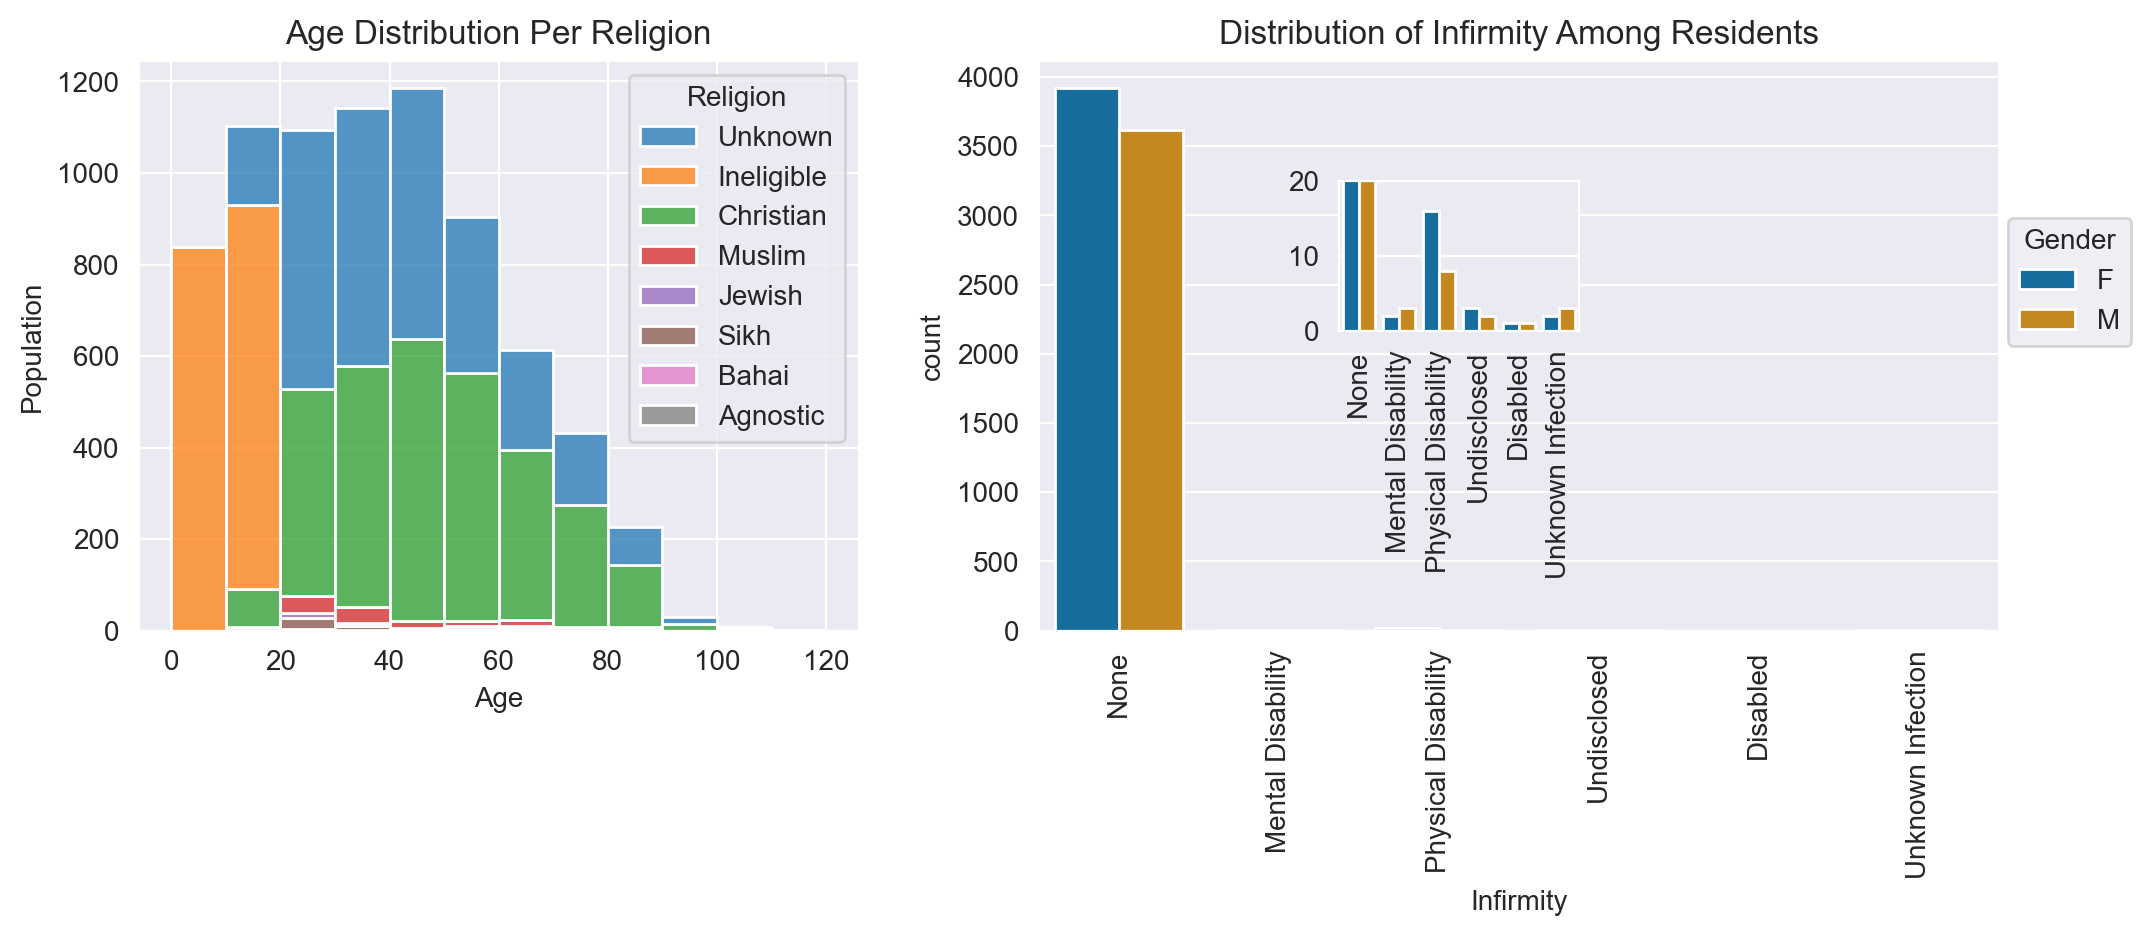

In [18]:
# Age per religion
sns.set_style(style='darkgrid')

age_per_religion_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = age_per_religion_fig.add_axes([0, 0, .6, .95]), age_per_religion_fig.add_axes([0.75, 0, .8, .95])

z = age_per_religion_fig.add_axes([1, 0.5, .2, .25])
# pal = sns.dark_palette('blue', 8)

age_per_religion = sns.histplot(data=census_df, x='Age', hue='Religion', binwidth=10,
                              multiple='stack', ax=l)
bxplot = sns.countplot(data=census_df, x='Infirmity', hue='Gender', 
                     palette='colorblind', ax=r)

zoomed = sns.countplot(data=census_df, x='Infirmity', hue='Gender', orient='v',
                     palette='colorblind', ax=z)

zoomed.set_ylim(0, 20)

age_per_religion.set_ylabel('Population')

age_per_religion.set_title("Age Distribution Per Religion")
bxplot.set_title("Distribution of Infirmity Among Residents")

sns.move_legend(bxplot, [1.01, 0.5])
zoomed.get_legend().remove(), zoomed.set_xlabel(None), zoomed.set_ylabel(None)

zoomed.set_xticklabels(zoomed.get_xticklabels(), rotation=90)

bxplot.set_xticklabels(bxplot.get_xticklabels(), rotation=90)

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [19]:
fname = "Age_distribution_per_religion.png"
cd.fig_writer(fname, age_per_religion_fig)

'Age_distribution_per_religion.png'